<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Description de l'entreprise 📇

Walmart Inc. est une société de distribution américaine multinationale qui exploite une chaîne d'hypermarchés, de grands magasins à bas prix et de supermarchés aux États-Unis, dont le siège est à Bentonville, en Arkansas. L'entreprise a été fondée par Sam Walton en 1962.

## Projet 🚧

Le service marketing de Walmart vous a demandé de construire un modèle d'apprentissage automatique capable d'estimer les ventes hebdomadaires dans leurs magasins, avec la meilleure précision possible sur les prédictions effectuées. Un tel modèle les aiderait à mieux comprendre comment les ventes sont influencées par les indicateurs économiques et pourrait être utilisé pour planifier les futures campagnes marketing.

## Objectifs 🎯

Le projet peut être divisé en trois étapes :

* Partie 1 : réaliser une analyse exploratoire des données (EDA) et tous les prétraitements nécessaires pour préparer les données à l'apprentissage automatique.
* Partie 2 : entraîner un modèle de régression linéaire (baseline).
* Partie 3 : éviter l'overfitting' en entraînant un modèle de régression régularisée.

## Scope du projet 🖼️

Pour ce projet, vous travaillerez avec un ensemble de données contenant des informations sur les ventes hebdomadaires réalisées par différents magasins Walmart, ainsi que d'autres variables telles que le taux de chômage ou le prix du carburant, qui pourraient être utiles pour prédire le montant des ventes. L'ensemble de données a été extrait d'une compétition Kaggle, mais nous avons apporté quelques modifications par rapport aux données originales. Assurez-vous donc d'utiliser notre ensemble de données personnalisé (disponible sur JULIE). 🤓

## Deliverable 📬

Pour mener à bien ce projet, votre équipe devrait :

* Créer des visualisations.
* Entraîner au moins un modèle de régression linéaire sur l'ensemble de données, qui prédit le montant des ventes hebdomadaires en fonction des autres variables.
* Évaluer les performances du modèle en utilisant une métrique pertinente pour les problèmes de régression.
* Interpréter les coefficients du modèle pour identifier quelles caractéristiques sont importantes pour la prédiction.
* Entraîner au moins un modèle avec une régularisation (Lasso ou Ridge) pour réduire le surajustement.

# Import des libraries et du dataset

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Walmart_Store_sales.csv")
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


# EDA

#### 1. Affichage des stats basiques et suppression des NaN

In [4]:
# Stats basiques
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
# Suppression des NaN de la target
dataset.dropna(subset=['Weekly_Sales'], inplace=True)

#### 2. Analyse des features par graphe

Commençons par analyser nos features par des graphes en bar de façon à avoir une représentation visuel du dataset. 

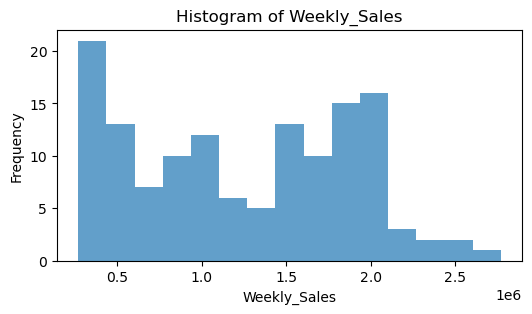

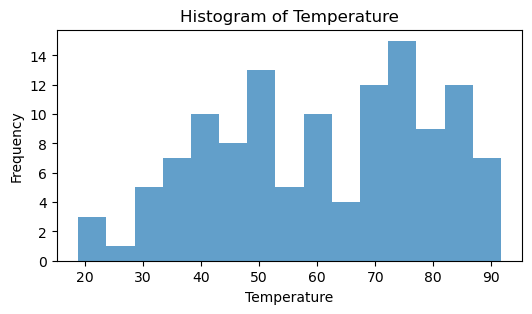

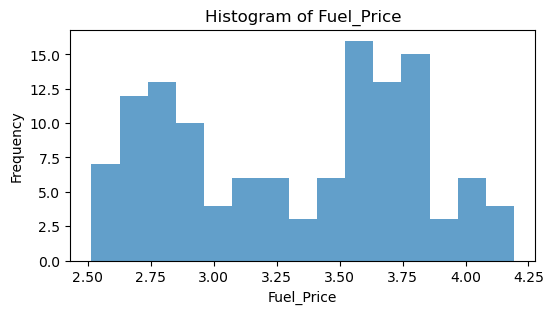

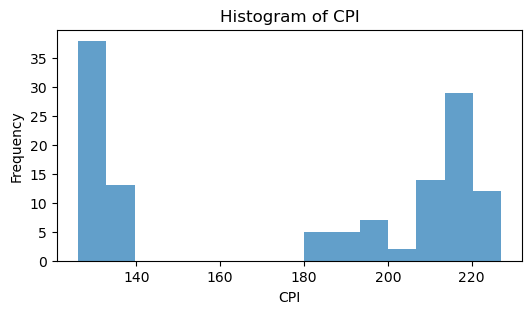

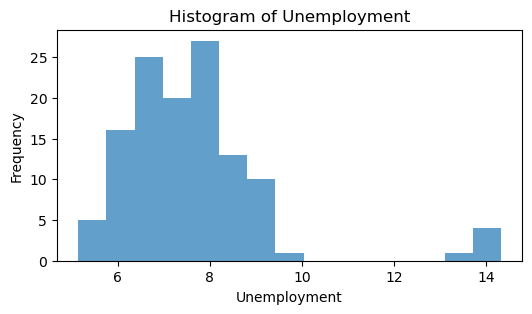

In [6]:
# Création de figures en bar pour une meilleur représentation visuel du dataset.
num_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for column in num_features:
    plt.figure(figsize=(6, 3))
    plt.hist(dataset[column], bins=15, alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column) 
    plt.ylabel('Frequency')
    plt.show()

La majorité des ventes hebdomadaires se situe entre 500 000 et 1 000 000 dollars, avec une distribution asymétrique indiquant des semaines de ventes exceptionnellement élevées. Les ventes peuvent être influencées par des événements saisonniers ou promotionnels. Pour la modélisation, cette variable est essentielle.

Les températures observées sont principalement entre 40 et 80 degrés Fahrenheit. La température affecte les ventes de produits saisonniers, ce qui en fait une variable importante pour prédire les variations saisonnières des ventes.

La distribution montre des variations fréquentes des prix du carburant, impactant le comportement d'achat des consommateurs et les coûts de transport. Intégrer cette variable peut améliorer la précision des prédictions en capturant les effets économiques.

Le CPI présente une distribution bimodale, reflétant différentes périodes de niveaux de prix. En tant qu'indicateur de l'inflation, il affecte le pouvoir d'achat des consommateurs. L'inclure dans la modélisation permet de capturer les effets de l'inflation sur les ventes.

La distribution du taux de chômage est centrée autour de 7-9%. Un taux de chômage élevé diminue les dépenses des consommateurs. Cette variable est cruciale pour comprendre les impacts macroéconomiques sur les ventes.

#### 3. Suppression des outliers.

Identifions les éventuels outliers évoqués dans l'énoncé  par le biais de boxplot, nous les supprimerons ensuite par le biais d'une fonction.

In [7]:
# Création de figures en box plot pour une meilleure représentation visuel des éventuelles outliers.

for column in num_features:
    fig = px.box(dataset, y=column, title=f'Box Plot of {column}')
    fig.update_layout(title=f'Box Plot of {column}',
                      yaxis_title=column,
                      xaxis_title=' ')
    fig.show()

Bien que l'énoncé évoquait des outliers dans les colonnes "Temperature", "Fuel_price", "CPI" and "Unemployment", seul employement est réellement concernée.

In [8]:
# Fonction pour identifier les outliers
def identify_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[np.abs(df[column] - mean) > (3 * std)]
    return outliers

In [9]:
# Fonction pour retirer les outliers et afficher les statistiques
def remove_outliers_with_stats(df, column_list):
    outliers_stats = {}
    
    for column in column_list:
        outliers = identify_outliers(df, column)
        if len(outliers) > 0:
            outliers_stats[column] = {
                'count': len(outliers),
                'mean': outliers[column].mean(),
                'std': outliers[column].std(),
                'min': outliers[column].min(),
                'max': outliers[column].max()
            }
        else:
            outliers_stats[column] = {
                'count': 0,
                'mean': None,
                'std': None,
                'min': None,
                'max': None
            }
        mean = df[column].mean()
        std = df[column].std()
        df = df[np.abs(df[column] - mean) <= (3 * std)]
    
    return df, outliers_stats

In [10]:
# Appliquer la fonction au dataset
dataset, outliers_stats = remove_outliers_with_stats(dataset, ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])

# Afficher les statistiques des outliers retirés
for column, stats in outliers_stats.items():
    print(f"Outliers in {column}:")
    print(f"Count: {stats['count']}")
    print(f"Mean: {stats['mean']}")
    print(f"Std: {stats['std']}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']}")
    print("\n")

Outliers in Temperature:
Count: 0
Mean: None
Std: None
Min: None
Max: None


Outliers in Fuel_Price:
Count: 0
Mean: None
Std: None
Min: None
Max: None


Outliers in CPI:
Count: 0
Mean: None
Std: None
Min: None
Max: None


Outliers in Unemployment:
Count: 4
Mean: 13.933
Std: 0.3782054115600851
Min: 13.503
Max: 14.313




In [11]:
# Sanity check des figures en box plot après suppressions des outliers.

for column in num_features:
    fig = px.box(dataset, y=column, title=f'Box Plot of {column}')
    fig.update_layout(title=f'Box Plot of {column}',
                      yaxis_title=column,
                      xaxis_title=' ')
    fig.show()

Les outliers ont bien été retirée pour la colonne "Unemployment".

#### 4. Matrice de corrélation des features et de la target

L'utilisation d'une matrice de corrélation nous permet de visualiser et d'évaluer les relations entre les caractéristiques et la variable cible, les ventes hebdomadaires. Cela aide à identifier les corrélations significatives et à détecter d'éventuels problèmes de multicollinéarité entre les variables. 

Utiliser cette matrice est utile pour optimiser notre modèle de régression en choisissant les caractéristiques les plus influentes et en éliminant les redondances.

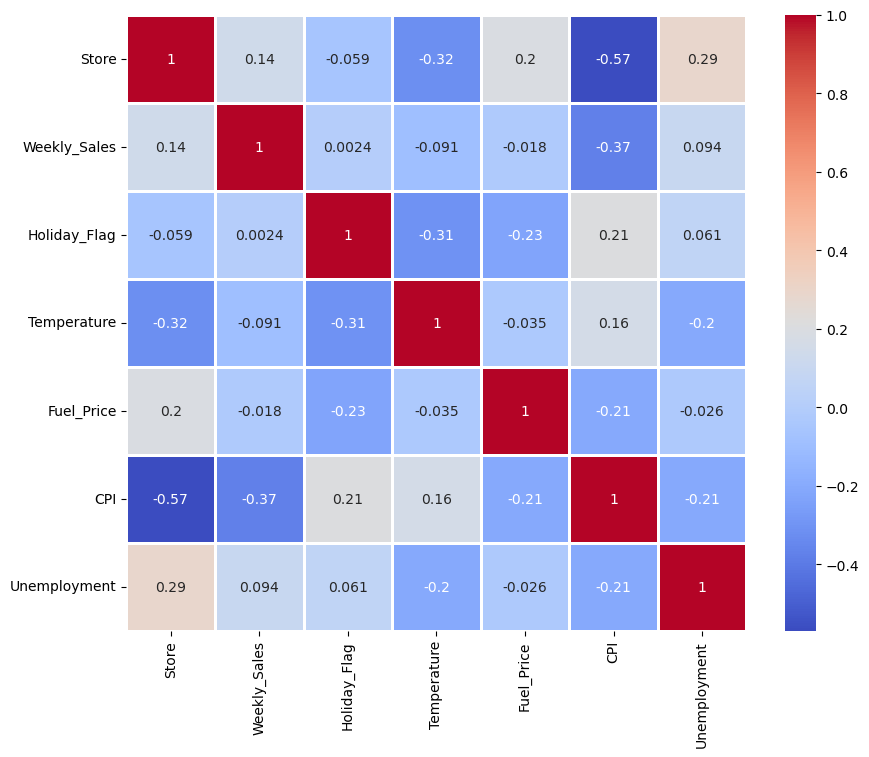

In [12]:
# Matrice de corrélation pour identifier les corrélations des features par rapport à la target.
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.show()

La matrice de corrélation révèle que les ventes hebdomadaires sont modérément corrélées négativement avec l'Indice des Prix à la Consommation (CPI) (-0.37) et faiblement corrélées positivement avec le taux de chômage (0.094).

Ces relations suggèrent que les ventes diminuent lorsque l'inflation augmente, tandis que les ventes de biens de première nécessité restent stables même en période de chômage élevé. En outre, la température (-0.2) et le taux de chômage (-0.21) montrent des corrélations saisonnières avec d'autres variables économiques.

# Preprocessing

Transformation de la colonne Date pour extraire des informations temporelles (année, mois, jour, jour de la semaine) qui peuvent capturer des tendances saisonnières et des effets calendaires, ce qui aide à améliorer la performance des modèles prédictifs. 

La colonne "Date" d'origine est ensuite supprimée car elle n'est plus nécessaire puiqu'elle a été segmenté.

In [13]:
# Transformation des dates nécessaires au préprocessing.
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['DayOfWeek'] = dataset['Date'].dt.dayofweek

dataset.drop('Date', axis=1, inplace=True)

C:\Users\33671\AppData\Local\Temp\ipykernel_3996\3522748167.py:2: UserWarning:

Parsing '18-02-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\33671\AppData\Local\Temp\ipykernel_3996\3522748167.py:2: UserWarning:

Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\33671\AppData\Local\Temp\ipykernel_3996\3522748167.py:2: UserWarning:

Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\33671\AppData\Local\Temp\ipykernel_3996\3522748167.py:2: UserWarning:

Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\33671\AppData\Local\Temp\ipykernel_3996\3522748167.py:2: UserWarning:

Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

## 1. Création modele linéaire en prenant en considération les variables de date (Year  Month   Day  DayOfWeek, Holiday_Flag).

Nous identifions les variables numériques et catégorielles pour les traiter différemment. Les variables numériques sont imputées et normalisées, tandis que les variables catégorielles sont imputées et encodées. Le ColumnTransformer combine ces transformations, et un pipeline intègre le prétraitement avec un modèle de régression linéaire. Enfin, le pipeline est entraîné sur les données d'entraînement, automatisant ainsi tout le processus de préparation des données et d'entraînement du modèle.

Dans cette partie, nous incluons directements les variables temporelles des dates pour optimiser le modèle. 

In [14]:
# Separation de la target (variable Y) des features X
print("Separation des labels des features...")
target_variable = 'Weekly_Sales'

X = dataset.drop(target_variable, axis = 1)
y = dataset[target_variable]

print("...Terminé.")
print()

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
6   15.0           0.0        69.80       4.069  134.855161         7.658   
7   20.0           0.0        39.93       3.617  213.023622         6.961   

     Year  Month   Day  DayOfWeek  
0  2011.0    2.0  18.0        4.0  
1  2011.0    3.0  25.0        4.0  
4  2010.0    5.0  28.0        4.0  
6  2011.0    3.0   6.0        6.0  
7  2012.0    3.0   2.0        4.0  


In [15]:
# Division du dataset en test et train set
print("Division en set de train et de test ...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("...Terminé.")
print()


Dividing into train and test sets...
...Done.



In [16]:
# Designation des features catégorielles et numériques
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
categorical_features = ['Store', 'Holiday_Flag']

# Transformation des features catégorielles et numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combination de tout le preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creation du pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrainement du model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment',
                                                   'Year', 'Month', 'Day',
                                                   'DayOfWeek']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Store', 'Holiday_Flag'])])),
                ('regressor', LinearRegression())])

In [17]:
linear_model=model_pipeline.named_steps["regressor"]
print(linear_model.coef_)
print(linear_model.intercept_)

[-1.54652237e+03 -4.95535198e+04  8.95505770e+05  3.44490165e+04
 -3.41753612e+04  6.61667573e+03 -5.02247508e+04 -1.98919267e+04
 -5.12953027e+05 -2.42227924e+05 -1.78270547e+06  2.09170580e+06
 -1.74018321e+06 -4.23212313e+05 -1.01764609e+06 -1.19001279e+06
 -1.64677143e+06  1.69822626e+06 -2.37615287e+05  1.97911437e+06
  6.39203927e+05  4.59657501e+05 -1.01310398e+06  7.67900956e+05
  8.38757469e+05  1.19993223e+06  1.31933006e+05  5.58321296e+04
 -5.58321296e+04]
1233592.716122856


### Interprétation des coefficients :

Valeurs positives : Les caractéristiques telles que le CPI et certaines catégories de magasins montrent des coefficients positifs, indiquant que des augmentations dans ces variables sont associées à une augmentation significative de la valeur cible. Par exemple, un coefficient positif pour le CPI signifie que lorsque le CPI augmente, la valeur prédite de la variable cible augmente également.

Valeurs négatives : À l'inverse, des caractéristiques comme le taux de chômage et certaines autres catégories de magasins montrent des coefficients négatifs, ce qui suggère que des augmentations dans ces variables sont liées à des diminutions de la valeur cible. Cela indique que plus ces variables augmentent, plus la valeur prédite de la variable cible diminue.

Interprétation de l'intercept : L'intercept de 1,233,592.716 signifie que si toutes les caractéristiques sont à zéro, la valeur prédite de la variable cible serait d'environ 1,233,592.716. Cela peut être interprété comme une base ou un point de départ pour les prédictions avant de prendre en compte les effets des caractéristiques individuelles.

In [18]:
# Prediction du pipeline de train  
print("Prediction avec X_test...")
y_train_pred = model_pipeline.predict(X_train)
print("...Terminé!")
print("Predictions:", y_train_pred[:5])

# Prediction du pipeline de test  
print("Prediction avec X_test...")
y_test_pred = model_pipeline.predict(X_test)
print("...Terminé!")
print("Predictions:", y_test_pred[:5])

Predicting with X_test...
...Done!
Predictions: [ 644739.87631778  355961.21302242 1283683.95825665  873600.72085916
 1545674.18777559]
Predicting with X_test...
...Done!
Predictions: [1575714.86430851  698307.09053609 1977352.5826447  1779803.95325088
  386351.11477159]


In [19]:
# Calcul de l'erreur quadratique moyenne et du coefficient de détermination R^2

# Calculer les scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les résultats
print("R2 score on training set : ", r2_train)
print("R2 score on test set : ", r2_test)

print("MSE score on training set : {:.2e}".format(mse_train))
print("MSE score on test set : {:.2e}".format(mse_test))

R2 score on training set :  0.9872729747897621
R2 score on test set :  0.9191907752940763
MSE score on training set : 5.32e+09
MSE score on test set : 4.08e+10


Nous pouvons identifier que le modele prédit très bien sur les données de train (98%) et de test 91%

Toutefois, le score mse du test semble bien trop élevé par rapport à celui du train qui est lui très correct. Nous pouvons en déduire que le modèle overfit. 

## Gridsearch

Nous appliquons GridSearchCV pour affiner les modèles de régression régularisée Ridge et Lasso en utilisant leurs paramètres par défaut. Le modèle Ridge aide à réduire le surajustement en ajoutant un terme de pénalité proportionnel au carré des coefficients de modèle, tandis que Lasso peut à la fois réduire le surajustement et effectuer une sélection de caractéristiques en ajoutant un terme de pénalité proportionnel à la valeur absolue des coefficients.

L'utilisation de GridSearchCV permet de tester systématiquement différentes valeurs du paramètre de régularisation pour identifier la combinaison optimale qui offre la meilleure généralisation sur les données non vues.

In [20]:
# Définition des pipelines pour les modèles régularisés
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

In [21]:
# Paramètres pour GridSearchCV
ridge_params = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000],}

lasso_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__max_iter': [10000]
}

# GridSearchCV pour Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5)
ridge_grid_search.fit(X_train, y_train)

# GridSearchCV pour Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5)
lasso_grid_search.fit(X_train, y_train)

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+11, tolerance: 2.488e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+11, tolerance: 2.426e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+11, tolerance: 2.430e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment',
                                                                          'Year',
                                                                          'Month',
                                                                          'Day',
                                                                          'DayOfWeek']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Store',
                                                                          'Holiday_Flag'])])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'regressor__max_iter': [10000]})

In [22]:
# Résultats et sélection du meilleur modèle
print("Best Ridge Model: ", ridge_grid_search.best_params_)
print("Best Ridge Score: ", ridge_grid_search.best_score_)
print("Best Lasso Model: ", lasso_grid_search.best_params_)
print("Best Lasso Score: ", lasso_grid_search.best_score_)

Best Ridge Model:  {'regressor__alpha': 0.1}
Best Ridge Score:  0.9233109124303223
Best Lasso Model:  {'regressor__alpha': 0.001, 'regressor__max_iter': 10000}
Best Lasso Score:  0.9547814970551401


In [23]:
# Prédiction avec le meilleur modèle Ridge
y_pred_ridge_test = ridge_grid_search.predict(X_test)
y_pred_ridge_train = ridge_grid_search.predict(X_train)

# Calcul des scores MSE
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)

# Calcul des scores R^2
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Afficher les résultats
print("Ridge Test MSE: {:.2e}".format(mse_ridge_test))
print("Ridge Train MSE: {:.2e}".format(mse_ridge_train))
print("R2 score on training set : ", r2_ridge_train)
print("R2 score on test set : ", r2_ridge_test)

Ridge Test MSE: 3.78e+10
Ridge Train MSE: 6.79e+09
R2 score on training set :  0.9837612931332376
R2 score on test set :  0.9249912829607378


In [24]:
# Prédiction avec le meilleur modèle Lasso
y_pred_lasso_test = lasso_grid_search.predict(X_test)
y_pred_lasso_train = lasso_grid_search.predict(X_train)

# Calcul des scores MSE
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)

# Calcul des scores R^2
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Afficher les résultats
print("Lasso Test MSE: {:.2e}".format(mse_lasso_test))
print("Lasso Train MSE: {:.2e}".format(mse_lasso_train))
print("R2 score on training set : ", r2_lasso_train)
print("R2 score on test set : ", r2_lasso_test)

Lasso Test MSE: 4.08e+10
Lasso Train MSE: 5.32e+09
R2 score on training set :  0.9872729747845091
R2 score on test set :  0.919191231290581


Ridge et Lasso montrent des améliorations en termes de généralisation par rapport au modèle de base, avec Ridge ayant un R2R2 légèrement meilleur et un MSE plus faible sur le test.

## 2. Création modele linéaire simplifié en retirant les variables de date (Year  Month   Day  DayOfWeek, Holiday_Flag).

Nous répétons ici les mêmes étapes que précédement mais en retirant les périodes de dates pour simplifier  le modèle se simplifie et identifier des  résultats potentiellement meilleurs.

In [25]:
# Designation des features catégorielles et numériques
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Store']

# Transformation des features catégorielles et numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combination de tout le preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creation du pipeline
model_pipeline_no_date = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrainement du model
model_pipeline_no_date.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Store'])])),
                ('regressor', LinearRegression())])

In [26]:
# Prediction du pipeline de train  
print("Predicting with X_test...")
y_train_pred = model_pipeline_no_date.predict(X_train)
print("...Done!")
print("Predictions:", y_train_pred[:5])

# Prediction du pipeline de test  
print("Predicting with X_test...")
y_test_pred = model_pipeline_no_date.predict(X_test)
print("...Done!")
print("Predictions:", y_test_pred[:5])

Predicting with X_test...
...Done!
Predictions: [ 587910.03631652  381270.68534621 1322601.15214723  868700.51998425
 1513651.78319965]
Predicting with X_test...
...Done!
Predictions: [1599499.95601356  564647.90192124 1800635.37710735 1718786.75965682
  484476.31172237]


In [27]:
# Calcul de l'erreur quadratique moyenne et du coefficient de détermination R^2

# Calcul des scores R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calcul des scores MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Afficher les résultats
print("R2 score on training set : ", r2_train)
print("R2 score on test set : ", r2_test)
print("MSE score on training set : {:.2e}".format(mse_train))
print("MSE score on test set : {:.2e}".format(mse_test))

R2 score on training set :  0.9820292636884717
R2 score on test set :  0.9345196619517507
MSE score on training set : 7.51e+09
MSE score on test set : 3.30e+10


En retirant la date, le modèle montre une amélioration notable de la performance sur le test en termes de R2R2 et de MSE, comparé à tous les autres modèles. Cela indique que la date pourrait être une source de bruit ou de surajustement, et sa suppression aide le modèle à mieux généraliser.

In [28]:
# Paramètres pour GridSearchCV
ridge_params = {
    'regressor__alpha': [0.1, 1, 10, 100, 1000],}

lasso_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__max_iter': [10000]
}

# GridSearchCV pour Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5)
ridge_grid_search.fit(X_train, y_train)

# GridSearchCV pour Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5)
lasso_grid_search.fit(X_train, y_train)

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+11, tolerance: 2.488e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+11, tolerance: 2.426e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+11, tolerance: 2.430e+09

c:\Users\33671\anaconda3\lib\site-packages\sklearn\linear_model\_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment',
                                                                          'Year',
                                                                          'Month',
                                                                          'Day',
                                                                          'DayOfWeek']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Store',
                                                                          'Holiday_Flag'])])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'regressor__max_iter': [10000]})

In [29]:
# Résultats et sélection du meilleur modèle
print("Best Ridge Model: ", ridge_grid_search.best_params_)
print("Best Ridge Score: ", ridge_grid_search.best_score_)
print("Best Lasso Model: ", lasso_grid_search.best_params_)
print("Best Lasso Score: ", lasso_grid_search.best_score_)

Best Ridge Model:  {'regressor__alpha': 0.1}
Best Ridge Score:  0.9233109124303223
Best Lasso Model:  {'regressor__alpha': 0.001, 'regressor__max_iter': 10000}
Best Lasso Score:  0.9547814970551401


In [30]:
# Prédiction avec le meilleur modèle Ridge
y_pred_ridge_test = ridge_grid_search.predict(X_test)
y_pred_ridge_train = ridge_grid_search.predict(X_train)

# Calcul des scores MSE
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)

# Calcul des scores R^2
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Afficher les résultats
print("Ridge Test MSE: {:.2e}".format(mse_ridge_test))
print("Ridge Train MSE: {:.2e}".format(mse_ridge_train))
print("R2 score on training set : ", r2_ridge_train)
print("R2 score on test set : ", r2_ridge_test)

Ridge Test MSE: 3.78e+10
Ridge Train MSE: 6.79e+09
R2 score on training set :  0.9837612931332376
R2 score on test set :  0.9249912829607378


In [31]:
# Prédiction avec le meilleur modèle Lasso
y_pred_lasso_test = lasso_grid_search.predict(X_test)
y_pred_lasso_train = lasso_grid_search.predict(X_train)

# Calcul des scores MSE
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)

# Calcul des scores R^2
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Afficher les résultats
print("Lasso Test MSE: {:.2e}".format(mse_lasso_test))
print("Lasso Train MSE: {:.2e}".format(mse_lasso_train))
print("R2 score on training set : ", r2_lasso_train)
print("R2 score on test set : ", r2_lasso_test)

Lasso Test MSE: 4.08e+10
Lasso Train MSE: 5.32e+09
R2 score on training set :  0.9872729747845091
R2 score on test set :  0.919191231290581


 Nous constatons que les modèles Ridge et Lasso avec ou sans Date présentent des résultats similaires. Cela pourrait expliquer que l'effet des dates sur les prédictions est relativement mineur ou que les modèles régularisés sont capables de minimiser l'impact des dates de manière efficace par la régularisation, rendant les résultats semblables avec ou sans la présence explicite de cette feature.

# Conclusion

Notre analyse des performances des différents modèles de régression sur les données de Walmart révèle que bien que les modèles prédisent très efficacement les données d'entraînement (98%) et de test (91%), le MSE élevé sur l'ensemble de test par rapport à l'entraînement suggère un overfitting du modèle initial. Les modèles Ridge et Lasso, en intégrant des termes de régularisation, montrent une meilleure capacité de généralisation, avec des scores de R2R2 et des MSE améliorés sur les données de test, ce qui indique une réduction du surajustement.

L'analyse révèle également que la suppression de la caractéristique "date" conduit à une performance nettement améliorée en termes de R2R2 et de MSE sur l'ensemble de test, suggérant que cette caractéristique peut introduire du bruit ou contribuer au surajustement. 

Les résultats comparables des modèles Ridge et Lasso, avec et sans la feature "date", indiquent que l'impact de cette caractéristique sur les prédictions est soit mineur, soit efficacement contrôlé par la régularisation appliquée dans ces modèles. Cette observation suggère que les approches de régularisation sont non seulement utiles pour gérer l'overfitting mais aussi pour modérer l'influence de caractéristiques potentiellement problématiques.

# Axes d'améliorations

- Création de nouvelles des features à partir des existantes pour mieux capturer les relations dans les données.

- Validation croisée répétée en augmentant le nombre de plis ou une validation croisée répétée pour obtenir une estimation plus fiable de la performance du modèle.

- Optimisation plus complexes sur les paramètres du Gridsearch afin de pénaliser le modèle de façon à le simplifier et réduire les risques d'overfitting.